# Pymaceuticals Inc.
---

### Analysis

In this exercise I am acting as a Senior Data Analyst for Pymaceuticals, a fictional pharmaceutical company testing an anti-cancer drug, Capomulin. I've been given access to data from their most recent animal study. In this study mice were given several drug regimens over a 45 day window. We are tasked with identifying how Capomulin performed against the other regimens.  

Capomulin, the regimen in question showed lower average tumor volume (~40 mm3) than all other drug regimens besides Ramicane, which had roughly the same average tumor volume in all mice after 45 days of treatment. A summary statistics dataframe along with a box plot highlight this finding.

The dataset used in this study appears to be fairly reliable and consistent. In the box plot below, out of the four drug regimens plotted there is only one potential outlier. This means that the results for Capomulin and the other drugs are consistent within different mice.

Interestingly, there was a positive correlation between mouse weight and tumor volume. The heavier the mouse the larger the tumor volume was. This should be investigated further to see why the size of a mouse may result in them having larger tumors. 

Capomulin and Ramicane showed tumors with the lowest average volume after 45 days of treatment. There is no evidence to suggest that Capomulin is a better treatment than Ramicane. In fact, the evidence suggests there is no difference between Capomulin and Ramicane when it comes to the average volume of a tumor in the treated mice after 45 days of study. 


 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_merged = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')
# Display the data table for preview
study_results_merged.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
study_results_merged['Mouse ID'].nunique()


249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_merged['Mouse ID & Timepoint'] = study_results_merged['Mouse ID'].astype(str) + study_results_merged['Timepoint'].astype(str)

duplicate_Mouse_df = study_results_merged[study_results_merged.duplicated('Mouse ID & Timepoint')]

duplicate_mouse_ID = duplicate_Mouse_df['Mouse ID'].unique()

duplicate_mouse_ID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mouse_data_df = study_results_merged.loc[(study_results_merged['Mouse ID'] == duplicate_mouse_ID[0]),:]

all_dup_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID & Timepoint
107,g989,0,45.000000,0,Propriva,Female,21,26,g9890
137,g989,0,45.000000,0,Propriva,Female,21,26,g9890
329,g989,5,48.786801,0,Propriva,Female,21,26,g9895
360,g989,5,47.570392,0,Propriva,Female,21,26,g9895
620,g989,10,51.745156,0,Propriva,Female,21,26,g98910
681,g989,10,49.880528,0,Propriva,Female,21,26,g98910
815,g989,15,51.325852,1,Propriva,Female,21,26,g98915
869,g989,15,53.442020,0,Propriva,Female,21,26,g98915
950,g989,20,55.326122,1,Propriva,Female,21,26,g98920
1111,g989,20,54.657650,1,Propriva,Female,21,26,g98920


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. The ~ means all rows where Mouse ID is NOT equal to the duplicate ID
study_results_merged_dedup = study_results_merged[~(study_results_merged['Mouse ID'] == duplicate_mouse_ID[0])]

study_results_merged_dedup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID & Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,b1280
1,f932,0,45.0,0,Ketapril,Male,15,29,f9320
2,g107,0,45.0,0,Ketapril,Female,2,29,g1070
3,a457,0,45.0,0,Ketapril,Female,11,30,a4570
4,c819,0,45.0,0,Ketapril,Male,21,25,c8190


In [10]:
# Checking the number of mice in the clean DataFrame.
study_results_merged_dedup['Mouse ID'].nunique()


248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = study_results_merged_dedup.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

med_tumor_vol = study_results_merged_dedup.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

tumor_vol_var = study_results_merged_dedup.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

tumor_vol_stdev = study_results_merged_dedup.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

tumor_vol_SEM = study_results_merged_dedup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

Tumor_vol_summary_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_vol,
                                     'Median Tumor Volume':med_tumor_vol,
                                     'Tumor Volume Variance':tumor_vol_var,
                                     'Tumor Volume Standard Deviation':tumor_vol_stdev,
                                     'Tumor Volume SEM':tumor_vol_SEM})

Tumor_vol_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

Tumor_vol_agg_summary_df = study_results_merged_dedup.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

## Bar and Pie Charts

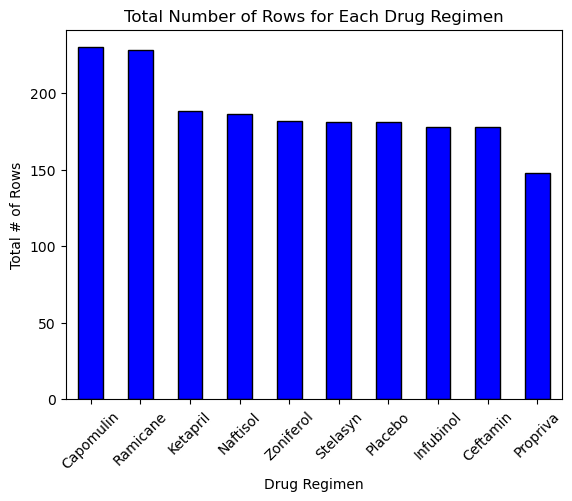

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Regimens = study_results_merged_dedup['Drug Regimen'].value_counts()



Regimens.plot(kind = 'bar', color= 'blue',edgecolor = 'black')

plt.xlabel('Drug Regimen')
plt.ylabel('Total # of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)

plt.show()

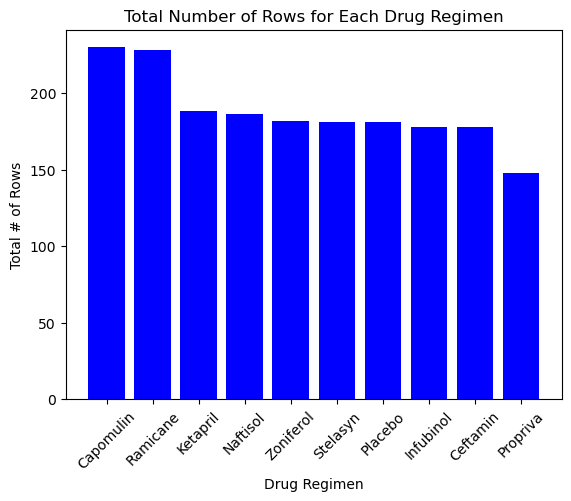

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens_df = Regimens.reset_index()

X_axis = regimens_df['Drug Regimen']
Y_axis = regimens_df['count']

plt.bar(X_axis,Y_axis,color='b',align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Total # of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(X_axis,rotation=45)
plt.show()


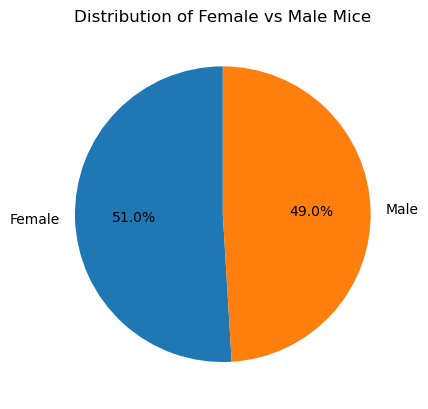

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_fem = study_results_merged_dedup['Sex'].value_counts()
labels = study_results_merged_dedup['Sex'].unique()

male_fem.plot(kind='pie',labels=labels,autopct='%1.1f%%',legend=False,startangle=90,title='Distribution of Female vs Male Mice')

plt.ylabel('')
plt.show()


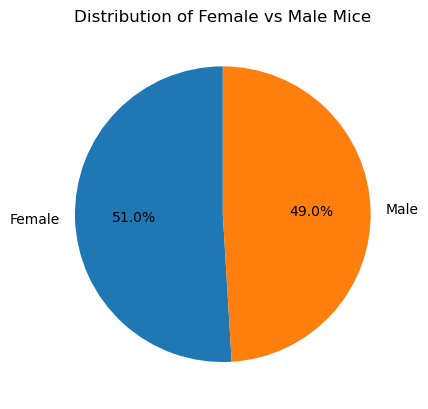

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_fem,labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
filter_values = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# This line of code was found using ChatGPT
filtered = study_results_merged_dedup['Drug Regimen'].isin(filter_values)

# This line of code was found using ChatGPT
filtered_df = study_results_merged_dedup[filtered]

greatest_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

greatest_timepoint = greatest_timepoint.reset_index()

greatest_timepoint['Mouse ID & Timepoint'] = greatest_timepoint['Mouse ID'].astype(str) + greatest_timepoint['Timepoint'].astype(str)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol_df = pd.merge(greatest_timepoint,study_results_merged_dedup,on='Mouse ID & Timepoint',how='left')

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
filter_values = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in filter_values:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
     temp_df = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == x,'Tumor Volume (mm3)']
     
     quartiles = temp_df.quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = round(upperq-lowerq,2)
     Tumor_vol.append(list(temp_df))    

    # add subset 
     lower_bound = round(lowerq - (1.5*iqr),2)
     upper_bound = round(upperq + (1.5*iqr),2)
    
    # Determine outliers using upper and lower bounds
     print(f"The IQR for {x} is {iqr} and potential outliers are below {lower_bound} and above {upper_bound}")


The IQR for Capomulin is 7.78 and potential outliers are below 20.71 and above 51.83
The IQR for Ramicane is 9.1 and potential outliers are below 17.91 and above 54.31
The IQR for Infubinol is 11.48 and potential outliers are below 36.83 and above 82.75
The IQR for Ceftamin is 15.58 and potential outliers are below 25.35 and above 87.67


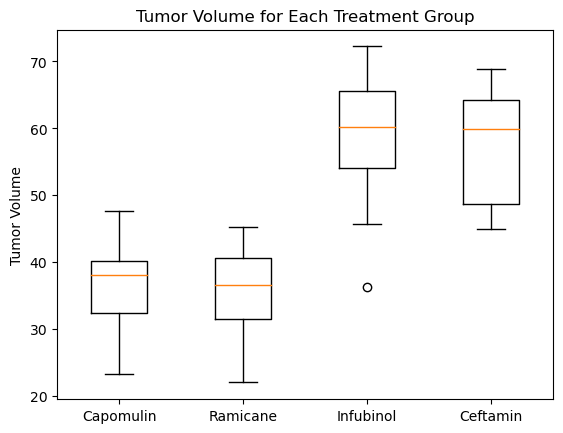

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_vol,labels=filter_values)

plt.show()

## Line and Scatter Plots

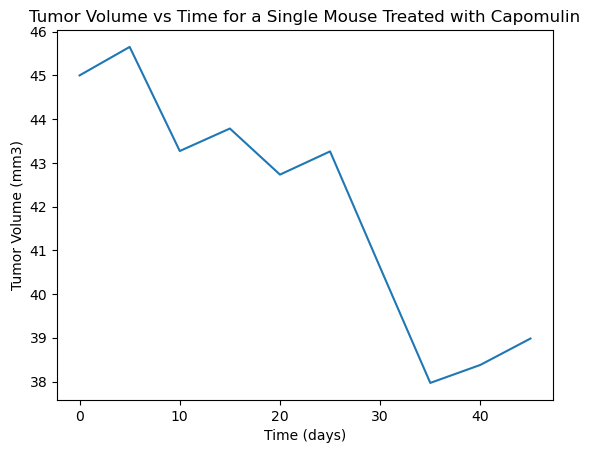

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I manually looked at the data to find a mouse treated with capomulin

# Retrieve timepoints
timepoints = study_results_merged_dedup.loc[(study_results_merged_dedup['Mouse ID'] == 'b128'),['Timepoint']]

# Retrieve tumor volume
Tumor_vol_line_plt = study_results_merged_dedup.loc[(study_results_merged_dedup['Mouse ID'] == 'b128'),['Tumor Volume (mm3)']]

plt.plot(timepoints,Tumor_vol_line_plt)

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Tumor Volume vs Time for a Single Mouse Treated with Capomulin')

plt.show()


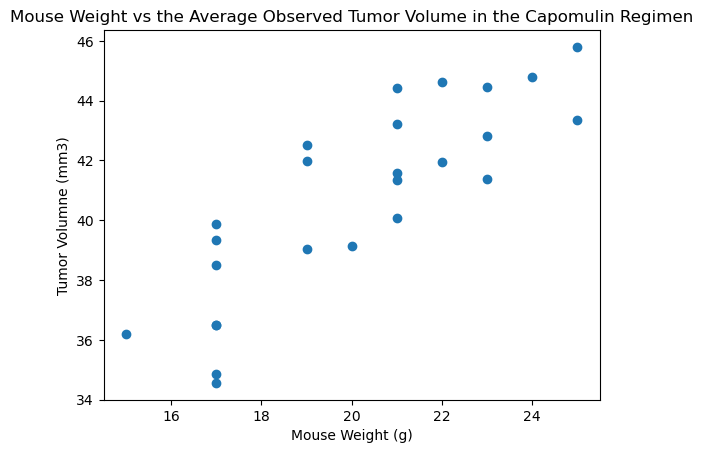

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create a dataframe of only the Capomulin Regimen
avg_obs_tumor_vol_df = study_results_merged_dedup.loc[(study_results_merged_dedup['Drug Regimen'] == 'Capomulin'),['Mouse ID','Tumor Volume (mm3)','Weight (g)']]

# Find the average tumor volume for each mouse and store as a list
avg_obs_tumor_vol = list(avg_obs_tumor_vol_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

# Find the average mouse weight (although same for all datapoints) and store as a list
mouse_weight = list(avg_obs_tumor_vol_df.groupby('Mouse ID')['Weight (g)'].mean())

# plot those list as a scatter plot. Apologies if Axis is flipped, this made most sense to me.
plt.scatter(mouse_weight,avg_obs_tumor_vol)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volumne (mm3)')
plt.title('Mouse Weight vs the Average Observed Tumor Volume in the Capomulin Regimen')
plt.show()


## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Unpack the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_obs_tumor_vol)

# Calculate and print the correlation coefficient
correlation = st.pearsonr(mouse_weight,avg_obs_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Print the linear regression model

print(f"The linear regression model is y = {round(slope,2)}x + {round(intercept,2)}")



The correlation coefficient between mouse weight and average tumor volume is 0.84
The linear regression model is y = 0.95x + 21.55
